In [16]:
# Import useful packages
import pandas as pd
pd.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package


# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# import and print data
# data = pandas.read_csv("soil_observations.csv") # requires file to be loaded in the directory
data = pd.read_csv("basdata2new.csv") #reads the comma separated variables(data) and separates it 
data = data.dropna()
'''data = data.drop(data.index[[2,3,15,32,61,67,73,74,102,104]])
data = data[['GPA', 'weight']] #selects the two colums listed in the brackets

data['weight'] = data['weight'].astype(float)
data['GPA'] = data['GPA'].astype(float)
print (data.dtypes)'''
data.head(25)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25.0,OKC,31.0,2.0,588.0,3.4,9.6,...,0.923,0.3,2.6,2.9,1.2,1.0,0.4,0.9,3.2,10.1
1,2,Quincy Acy\acyqu01,PF,28.0,PHO,10.0,0.0,123.0,1.2,5.3,...,0.700,0.9,6.4,7.3,2.3,0.3,1.2,1.2,7.0,5.0
2,3,Jaylen Adams\adamsja01,PG,22.0,ATL,34.0,1.0,428.0,3.2,9.3,...,0.778,0.9,4.1,5.0,5.5,1.2,0.4,2.4,3.8,9.1
3,4,Steven Adams\adamsst01,C,25.0,OKC,80.0,80.0,2669.0,6.5,10.9,...,0.500,5.3,5.0,10.3,1.7,1.6,1.0,1.8,2.8,14.9
4,5,Bam Adebayo\adebaba01,C,21.0,MIA,82.0,28.0,1913.0,5.3,9.1,...,0.735,3.1,8.1,11.2,3.5,1.3,1.2,2.3,3.8,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,21,OG Anunoby\anunoog01,SF,21.0,TOR,67.0,6.0,1352.0,4.9,10.8,...,0.581,1.5,3.7,5.2,1.3,1.2,0.6,1.5,3.7,12.5
23,22,Ryan Arcidiacono\arcidry01,PG,24.0,CHI,81.0,32.0,1961.0,3.4,7.7,...,0.873,0.5,3.5,4.0,4.9,1.2,0.1,1.2,3.1,10.0
24,23,Trevor Ariza\arizatr01,SF,33.0,TOT,69.0,69.0,2349.0,4.5,11.3,...,0.793,0.8,4.9,5.7,3.9,1.4,0.3,1.6,2.0,13.2
25,23,Trevor Ariza\arizatr01,SF,33.0,PHO,26.0,26.0,884.0,3.5,9.2,...,0.837,0.7,5.3,5.9,3.5,1.5,0.3,1.6,1.8,10.5


In [17]:
def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x]) 
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure() # histogram
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

R-squared =  0.005
Regression equation: FG =  -0.03 * Age +  6.302


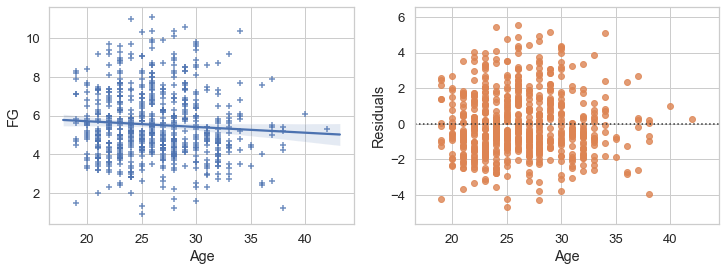

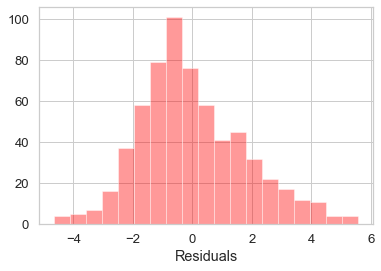

In [27]:
regression_model('Age','FG')

In [10]:
#data['weight'] = data['weight'].astype(float)
#data['GPA'] = gpa.astype(float)
data1 = data[['GPA', 'weight']] #selects the two colums listed in the brackets
print (data.dtypes)
data.dropna()
data1.drop([2,3])
data1.head(5)


#data= pd.DataFrame({'GPA': gpa, 'weight': weight}) 
#data = data[['GPA', 'weight']] #selects the two colums listed in the brackets




KeyError: "None of [Index(['GPA', 'weight'], dtype='object')] are in the [columns]"

In [ ]:
import numpy as np
def average():   #defines a function named average to calculate the average price of students
    add = 0 #initiates a the variable add with 0
    for i in price: #starts a loop that activates each element in the list
        add += i #adds the numbers in the list to the previous value; implicitly finds the sum
    total = len(price) #stores the number of elements in the list as the variable 'total' 
    return round(add/total,1)
#returns the quotient of the sum and the total element and rounds up to 3 decimal places
print("The mean price is ",average()) # prints the value of the average

#function to find median
def median():  #defines a function named median to calculate the mid price value
    price.sort() #sorts out the price list in ascending order of values
    a =(len(price) + 1)/2 #finds the (n+1/2)th term in the list and assigns it to 'a' 
    ind= int(a) - 1 #finds the index of the median which is gotten by subtracting 1 from the term number
    return price[ind] #returns the median by calling the index in the list
print("The median price is ", median()) #prints the median


#function to find range
def list_range(): #defines a function named list_range to calculate the highest minus the lowest variables 
    highest = max(price) #finds the highest number in the list by calling the function max()
    lowest = min(price) #finds the lowest number in the list by calling the function min() 
    return highest-lowest #returns the difference between the highest and lowest
print("The range of price is " ,list_range()) #prints the final range value

#function to find standard deviation
def stdev(): #defines a function named stdev to calculate the standard deviation of variables
    add = 0 #initializes the add variable
    for i in price: #starts a loop for elements in the list
        add += i #finds the sum of numbers by adding the next number in the list to the previous one 
    total = len(price) #calculates the total number of elements
    avg = add/total #finds the average by dividing the sum by the total number of occurence 
    sum_diffsq = 0 #initializes the sum_diffsq variable
    for i in price: #starts a loop for elements in the list
        sum_diffsq += (i - avg)**2 #assigns the formula of difference square and sums the values 
    sd = (sum_diffsq / (total-1)) ** 0.5 #finds the standard deviation by finding the square root 
    #and subtraction one from the total due to Benfel's correction
    return round(sd, 2) #returns the standard deviation in 2 decimal places
print("The standard deviation of price is ", stdev()) #prints the standard deviation
#function to find mode
def mode():  #defines a function named mode to calculate the highest frequency of price
    mode_count=0 #initializes a variable 'mode_count' as 0 
#for count of number appearing
    for i in range(len(price)):
        #starts a loop for each element in the number of variables in the list 
        icount = price.count(price[i])
        #stores the number of times a variable appears in the list in icount
#for storing count of each number in list will be stored
        if icount > mode_count: #sets a condition when the count is more than the previous one
            mode = price[i]
            #the loop activates if current count is greater than the previous count
            
            mode_count = icount #the frequency of the mode is stored in mode_count 
    return mode #returns the mode
print("The mode price is ", mode()) #prints the value of the mode



